<a href="https://colab.research.google.com/github/Azerguluzada/Data-Science-with-Python/blob/main/Optuna_technique_and_AUTOML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [36]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [37]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [ ]:
#1)With optuna method and using train data  choose best method among Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier"
#and optimeze these method based on following parameters.
#max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
#max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
#Evaluate performance of the best method on test data using eval function defined above.
#Note: This should be similar to what we have done in the exercises in class.

In [40]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.1 MB/s eta 0:00:00


In [41]:
# Minimize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=20)

print(study.best_params) # E.g. {'x': 2.002108042}
print(study.best_trial)

[I 2024-04-22 17:42:32,647] A new study created in memory with name: no-name-8ee7a421-44d9-4415-9291-5f15a4856596
[I 2024-04-22 17:42:32,664] Trial 0 finished with value: 0.12063258172314009 and parameters: {'x': 2.3473220144522084}. Best is trial 0 with value: 0.12063258172314009.
[I 2024-04-22 17:42:32,680] Trial 1 finished with value: 18.630409668983773 and parameters: {'x': -2.3162958273250656}. Best is trial 0 with value: 0.12063258172314009.
[I 2024-04-22 17:42:32,688] Trial 2 finished with value: 43.15477654912619 and parameters: {'x': 8.569229524771242}. Best is trial 0 with value: 0.12063258172314009.
[I 2024-04-22 17:42:32,695] Trial 3 finished with value: 3.9895131887669786 and parameters: {'x': 0.0026234233958337683}. Best is trial 0 with value: 0.12063258172314009.
[I 2024-04-22 17:42:32,702] Trial 4 finished with value: 98.89299656031295 and parameters: {'x': -7.944495792161257}. Best is trial 0 with value: 0.12063258172314009.
[I 2024-04-22 17:42:32,708] Trial 5 finished

{'x': 2.3473220144522084}
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.12063258172314009], datetime_start=datetime.datetime(2024, 4, 22, 17, 42, 32, 662870), datetime_complete=datetime.datetime(2024, 4, 22, 17, 42, 32, 664295), params={'x': 2.3473220144522084}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=0, value=None)


In [42]:
# Maximize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study(direction="maximize")#We specify this is maximization problem
study.optimize(objective, n_trials=100)

print(study.best_params) # E.g. {'x':- 9.992108042}
print(study.best_trial)

[I 2024-04-22 17:42:36,022] A new study created in memory with name: no-name-cd92d324-cda1-4d92-aa42-85f4828ee5fa
[I 2024-04-22 17:42:36,031] Trial 0 finished with value: 25.019922147307604 and parameters: {'x': 7.001991817996867}. Best is trial 0 with value: 25.019922147307604.
[I 2024-04-22 17:42:36,039] Trial 1 finished with value: 58.0368467146116 and parameters: {'x': 9.618191827107768}. Best is trial 1 with value: 58.0368467146116.
[I 2024-04-22 17:42:36,053] Trial 2 finished with value: 41.68654275194133 and parameters: {'x': 8.456511655061217}. Best is trial 1 with value: 58.0368467146116.
[I 2024-04-22 17:42:36,067] Trial 3 finished with value: 47.50483015870887 and parameters: {'x': 8.892374783680069}. Best is trial 1 with value: 58.0368467146116.
[I 2024-04-22 17:42:36,073] Trial 4 finished with value: 44.146215185483825 and parameters: {'x': 8.644261823971405}. Best is trial 1 with value: 58.0368467146116.
[I 2024-04-22 17:42:36,078] Trial 5 finished with value: 4.181285127

{'x': -9.996164238845527}
FrozenTrial(number=60, state=TrialState.COMPLETE, values=[143.90795644535626], datetime_start=datetime.datetime(2024, 4, 22, 17, 42, 37, 367693), datetime_complete=datetime.datetime(2024, 4, 22, 17, 42, 37, 392430), params={'x': -9.996164238845527}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=60, value=None)


In [43]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2024-04-22 17:42:42,994] A new study created in memory with name: no-name-e8dc1e65-5039-4a49-8450-abc02997600b
[I 2024-04-22 17:42:43,799] Trial 0 finished with value: 0.9315089672232529 and parameters: {'classifier': 'LightGBM', 'max_depth': 8, 'max_features': 11}. Best is trial 0 with value: 0.9315089672232529.
[I 2024-04-22 17:43:24,484] Trial 1 finished with value: 0.9188311688311689 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 23, 'max_features': 19}. Best is trial 0 with value: 0.9315089672232529.
[I 2024-04-22 17:43:25,299] Trial 2 finished with value: 0.9294990723562152 and parameters: {'classifier': 'XGBoost', 'max_depth': 33, 'max_features': 33}. Best is trial 0 with value: 0.9315089672232529.
[I 2024-04-22 17:43:25,754] Trial 3 finished with value: 0.9316635745207175 and parameters: {'classifier': 'LightGBM', 'max_depth': 27, 'max_features': 22}. Best is trial 3 with value: 0.9316635745207175.
[I 2024-04-22 17:43:28,293] Trial 4 finished with 

FrozenTrial(number=61, state=TrialState.COMPLETE, values=[0.9327458256029684], datetime_start=datetime.datetime(2024, 4, 22, 17, 46, 13, 624642), datetime_complete=datetime.datetime(2024, 4, 22, 17, 46, 14, 269584), params={'classifier': 'LightGBM', 'max_depth': 15, 'max_features': 33}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=34, log=False, low=2, step=1), 'max_features': IntDistribution(high=34, log=False, low=2, step=1)}, trial_id=61, value=None)


In [44]:
#Print Best Model
study.best_params

{'classifier': 'LightGBM', 'max_depth': 15, 'max_features': 33}

In [50]:
#Light GBM Test Result with Best Parameters
from lightgbm import LGBMClassifier
best_model = LGBMClassifier(max_depth=15,max_features=33,random_state=17)

# Fit the model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)

# Print the accuracy value
print("Test accuracy:", test_score)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2525, number of negative: 3943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390383 -> initscore=-0.445701
[LightGBM] [Info] Start training from score -0.445701


In [ ]:
#2)Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [1]:
! pip install pycaret


In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')


In [29]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.33,random_state=1)
df_train.shape,df_test.shape

((6190, 37), (3050, 37))

In [30]:
from pycaret.classification import *
s = setup(data = df_train, target = 'Converted', session_id=123,fold=5)

,Description,Value
0,Session id,123
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(6190, 37)"
4,Transformed data shape,"(6190, 154)"
5,Transformed train set shape,"(4333, 154)"
6,Transformed test set shape,"(1857, 154)"
7,Numeric features,6
8,Categorical features,30
9,Rows with missing values,78.6%


In [31]:
y_test=df_test['Converted']
test_data=df_test.drop(['Converted'],axis=1)
test_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2140,5f05a482-8fb5-4fe8-aca3-0f7b9d794178,639211,Lead Add Form,Reference,No,No,0.0,0,0.00,Email Link Clicked,...,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,No,Modified
7707,2004504c-f195-4d54-9df7-4cc40f03776e,590711,Landing Page Submission,Direct Traffic,No,No,4.0,1503,2.00,SMS Sent,...,No,Select,Mumbai,02.Medium,02.Medium,14.0,15.0,No,No,SMS Sent
1522,0918c483-3947-4cc0-99e6-56d29483f56b,644174,Landing Page Submission,Direct Traffic,No,No,3.0,1024,1.50,Email Opened,...,No,Other Leads,Other Cities of Maharashtra,03.Low,01.High,11.0,17.0,No,Yes,Email Opened
1873,f43a6791-8904-41af-a48a-25b6f208713b,641392,Landing Page Submission,Google,No,No,2.0,186,2.00,SMS Sent,...,No,Select,Mumbai,02.Medium,01.High,13.0,18.0,No,No,Modified
8100,60dba798-4aa7-4144-b955-d1ebfbdf755e,587955,API,Google,No,No,13.0,1725,3.25,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [32]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8955,0.9561,0.8346,0.8846,0.8587,0.7759,0.7769,2.9740
et,Extra Trees Classifier,0.8744,0.0000,0.6953,0.9658,0.8074,0.7182,0.7403,1.0940
nb,Naive Bayes,0.8068,0.0000,0.6469,0.8081,0.7178,0.5739,0.5826,0.9040
ridge,Ridge Classifier,0.6965,0.9701,0.2059,0.9883,0.3405,0.2411,0.3670,0.6780
knn,K Neighbors Classifier,0.6951,0.0000,0.5463,0.6118,0.5768,0.3399,0.3415,0.9620
rf,Random Forest Classifier,0.6697,0.0000,0.1339,0.9935,0.2339,0.1597,0.2911,1.0400
dt,Decision Tree Classifier,0.6190,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6660
ada,Ada Boost Classifier,0.6190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6720
gbc,Gradient Boosting Classifier,0.6190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3860
lda,Linear Discriminant Analysis,0.6190,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [33]:
xg = create_model('qda')
tuned2 = tune_model(xg)
tuned_predictions = predict_model(tuned2, data=test_data)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3829,0.5616,0.9970,0.3819,0.5523,0.0005,0.0059
1,0.6275,0.5063,0.0242,0.8889,0.0472,0.0275,0.1072
2,0.6344,0.5897,0.0394,1.0000,0.0758,0.0483,0.1574
3,0.6536,0.6104,0.1000,0.9167,0.1803,0.1139,0.2297
4,0.6247,0.5637,0.0212,0.7778,0.0413,0.0215,0.0837
Mean,0.5846,0.5663,0.2364,0.7931,0.1794,0.0424,0.1168
Std,0.1013,0.0350,0.3814,0.2175,0.1930,0.0389,0.0747


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9424,0.8610,0.8309,0.8457,0.7476,0.7480
1,0.8927,0.9459,0.8364,0.8762,0.8558,0.7705,0.7710
2,0.9066,0.9533,0.8515,0.8978,0.8740,0.7999,0.8006
3,0.8822,0.9397,0.7939,0.8851,0.8371,0.7453,0.7480
4,0.8799,0.9452,0.7848,0.8870,0.8328,0.7396,0.7430
Mean,0.8883,0.9453,0.8255,0.8754,0.8491,0.7606,0.7621
Std,0.0103,0.0046,0.0307,0.0233,0.0148,0.0223,0.0216


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [26]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

Accuracy: 0.8901639344262295
Precision: 0.8799298860648553
Recall: 0.8352745424292846


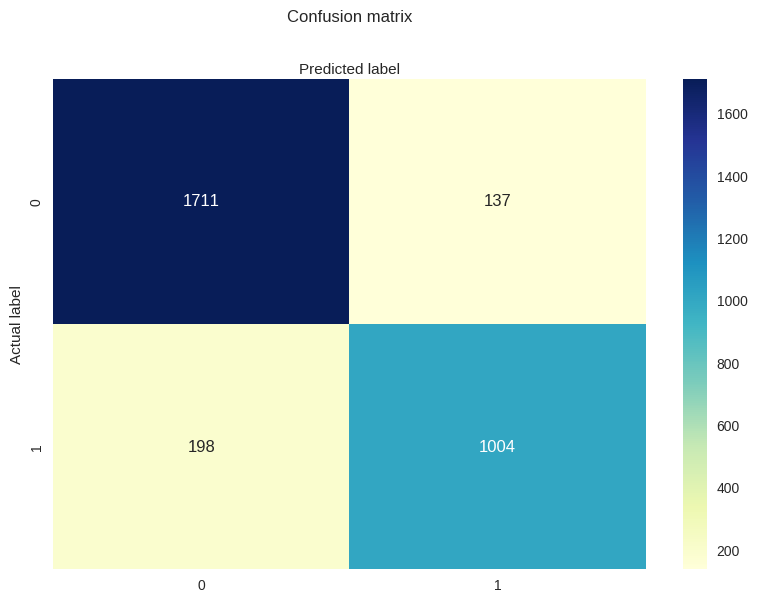

In [34]:
eval(y_test,tuned_predictions['prediction_label'])

In [ ]:
#3) Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [16]:
!pip install autogluon.tabular

ERROR: Operation cancelled by user


In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')


In [9]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.33,random_state=1)
df_train.shape,df_test.shape

((6190, 37), (3050, 37))

In [10]:
y_test=df_test['Converted']
test_data=df_test.drop(['Converted'],axis=1)
test_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2140,5f05a482-8fb5-4fe8-aca3-0f7b9d794178,639211,Lead Add Form,Reference,No,No,0.0,0,0.00,Email Link Clicked,...,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,No,Modified
7707,2004504c-f195-4d54-9df7-4cc40f03776e,590711,Landing Page Submission,Direct Traffic,No,No,4.0,1503,2.00,SMS Sent,...,No,Select,Mumbai,02.Medium,02.Medium,14.0,15.0,No,No,SMS Sent
1522,0918c483-3947-4cc0-99e6-56d29483f56b,644174,Landing Page Submission,Direct Traffic,No,No,3.0,1024,1.50,Email Opened,...,No,Other Leads,Other Cities of Maharashtra,03.Low,01.High,11.0,17.0,No,Yes,Email Opened
1873,f43a6791-8904-41af-a48a-25b6f208713b,641392,Landing Page Submission,Google,No,No,2.0,186,2.00,SMS Sent,...,No,Select,Mumbai,02.Medium,01.High,13.0,18.0,No,No,Modified
8100,60dba798-4aa7-4144-b955-d1ebfbdf755e,587955,API,Google,No,No,13.0,1725,3.25,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [12]:
predictor= TabularPredictor(label ='Converted').fit(train_data = df_train, verbosity = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20240422_172413"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240422_172413"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.969305    accuracy       0.165116  68.516648                0.001780           0.245927            2       True         13
1        NeuralNetTorch   0.962843    accuracy       0.030423  49.567707                0.030423          49.567707            1       True         11
2            LightGBMXT   0.962843    accuracy       0.034641   1.983478                0.034641           1.983478            1       True          3
3              LightGBM   0.961228    accuracy       0.025486   1.219341                0.025486           1.219341            1       True          4
4               XGBoost   0.959612    accuracy       0.049975   5.263303                0.049975           5.263303            1       True         10
5       NeuralNetFastAI   0.9579

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6898222940226171,
  'KNeighborsDist': 0.6833602584814217,
  'LightGBMXT': 0.962843295638126,
  'LightGBM': 0.9612277867528272,
  'RandomForestGini': 0.938610662358643,
  'RandomForestEntr': 0.9353796445880452,
  'ExtraTreesGini': 0.9289176090468497,
  'ExtraTreesEntr': 0.9289176090468497,
  'NeuralNetFastAI': 0.9579967689822294,
  'XGBoost': 0.9596122778675282,
  'NeuralNetTorch': 0.962843295638126,
  'LightGBMLarge': 0.9499192245557351,
  'WeightedEnsemble_L2': 0.9693053311793215},
 '

In [14]:
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.994346,0.949919,accuracy,0.328550,0.032357,2.065972,0.328550,0.032357,2.065972,1,True,12
1,RandomForestGini,0.993861,0.938611,accuracy,0.574232,0.096787,2.200843,0.574232,0.096787,2.200843,1,True,5
2,RandomForestEntr,0.993538,0.935380,accuracy,0.565887,0.256693,2.454202,0.565887,0.256693,2.454202,1,True,6
3,ExtraTreesGini,0.992892,0.928918,accuracy,0.562805,0.169394,2.643129,0.562805,0.169394,2.643129,1,True,7
4,ExtraTreesEntr,0.992892,0.928918,accuracy,0.648135,0.104975,1.655405,0.648135,0.104975,1.655405,1,True,8
5,LightGBM,0.992246,0.961228,accuracy,0.227779,0.025486,1.219341,0.227779,0.025486,1.219341,1,True,4
6,WeightedEnsemble_L2,0.988691,0.969305,accuracy,1.378132,0.165116,68.516648,0.014390,0.001780,0.245927,2,True,13
7,XGBoost,0.988368,0.959612,accuracy,0.259268,0.049975,5.263303,0.259268,0.049975,5.263303,1,True,10
8,NeuralNetFastAI,0.986753,0.957997,accuracy,0.340948,0.072787,15.500194,0.340948,0.072787,15.500194,1,True,9
9,NeuralNetTorch,0.985299,0.962843,accuracy,0.177490,0.030423,49.567707,0.177490,0.030423,49.567707,1,True,11


In [15]:
predictor.feature_importance(data=df_train)


These features in provided data are not utilized by the predictor and will be ignored: ['Prospect ID', 'Magazine', 'X Education Forums', 'Newspaper', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
Computing feature importance via permutation shuffling for 28 features using 5000 rows with 5 shuffle sets...
	131.76s	= Expected runtime (26.35s per shuffle set)
	135.77s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Tags,0.28156,0.002330,5.625193e-10,5,0.286357,0.276763
Total Time Spent on Website,0.03364,0.003272,1.060998e-05,5,0.040378,0.026902
Last Notable Activity,0.02476,0.001740,2.908277e-06,5,0.028343,0.021177
What matters most to you in choosing a course,0.02024,0.000654,1.308043e-07,5,0.021587,0.018893
Lead Number,0.02000,0.001166,1.380934e-06,5,0.022401,0.017599
Asymmetrique Activity Score,0.01892,0.002759,5.275700e-05,5,0.024601,0.013239
Last Activity,0.01884,0.000713,2.453335e-07,5,0.020308,0.017372
Specialization,0.00908,0.001221,3.836794e-05,5,0.011595,0.006565
Page Views Per Visit,0.00856,0.000623,3.341101e-06,5,0.009843,0.007277
Lead Origin,0.00472,0.000729,6.630310e-05,5,0.006222,0.003218


In [17]:
y_pred = predictor.predict(test_data)
y_pred=pd.DataFrame(y_pred,columns=['Converted'])
y_pred #print the DataFrame

,Converted
2140,1
7707,1
1522,1
1873,0
8100,1
...,...
5408,1
4329,0
1235,0
7722,1


In [23]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

Accuracy: 0.9537704918032787
Precision: 0.9514893617021276
Recall: 0.930116472545757


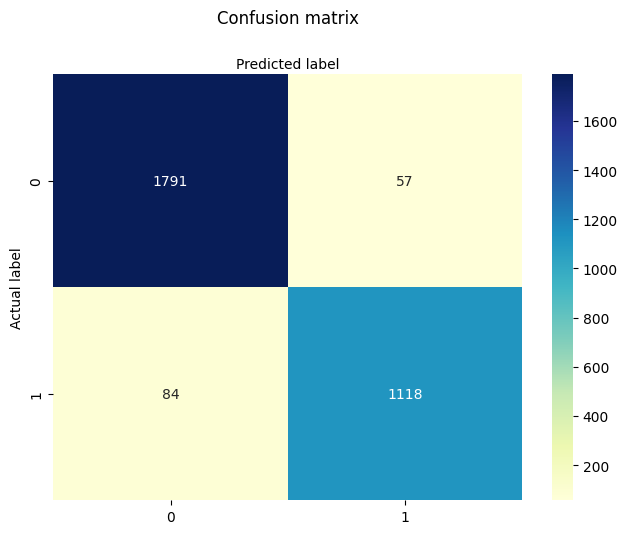

In [24]:
eval(y_test,y_pred)

In [25]:
predictor.evaluate(df_test)

{'accuracy': 0.9537704918032787,
 'balanced_accuracy': 0.9496361583508006,
 'mcc': 0.9029732237594691,
 'roc_auc': 0.9863381557433137,
 'f1': 0.9406815313420278,
 'precision': 0.9514893617021276,
 'recall': 0.930116472545757}